 <img src = "blackpng.png" height = "600" width = "200" />

# Histogram Equalization




### What is a Histogram??

In Statistics, Histogram is a graphical representation showing a visual impression of the distribution of data.

![alt text](
https://raw.githubusercontent.com/iitmcvg/Content/13548ea3ba6536fb050ccea145c01dd24f0d9c5c/Topics/Computer%20Vision/HistogramEqualisation/exams.jpg)

We can note in the image above that vividly shows the distribution of marks of a class. Along X-axis we have marks bins (each of 10 Marks width) and histograms describes how the marks of the class is spread among students. Moreover we can note that less students have got marks between 90-100 and 0-10. Many students have got marks between 50-60

### Histogram in the context of image processing

In image processing, histograms are associated with the intensity values of pixels. For an 8 bit greyscale, we have 256 different bins (0-255).

 
Examples of histograms are:
![alt text](https://raw.githubusercontent.com/iitmcvg/Content/13548ea3ba6536fb050ccea145c01dd24f0d9c5c/Topics/Computer%20Vision/HistogramEqualisation/histogramexample.jpg)



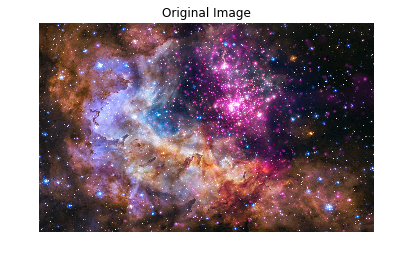

In [5]:
import cv2
import matplotlib.pyplot as plt
#uploading an image
img = cv2.imread('space.jpg')
plt.axis("off")
plt.title("Original Image")  
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [6]:
'''
cv2.calcHist(images, channels, mask, histSize, ranges[, hist[, accumulate]])
images : it is the source image of type uint8 or float32. it should be given in square brackets, ie, "[img]".
channels : it is also given in square brackets. It is the index of channel for which we calculate histogram. For example, if input is grayscale image, its value is [0]. For color image, you can pass [0], [1] or [2] to calculate histogram of blue, green or red channel respectively.
mask : mask image. To find histogram of full image, it is given as "None". But if you want to find histogram of particular region of image, you have to create a mask image for that and give it as mask. (I will show an example later.)
histSize : this represents our BIN count. Need to be given in square brackets. For full scale, we pass [256].
ranges : this is our RANGE. Normally, it is [0,256].
'''
hist = cv2.calcHist([img],[0], None, [256], [0,256])
# Note: Histograms can be calculated using numpy functions also. They will
# also the same output as the openCV functions. But the OpenCV functions are 
# more faster (40X) than numpy functions
# Code in Numpy
# hist, bins = np.histogram(img.ravel(), 256, [0,256])



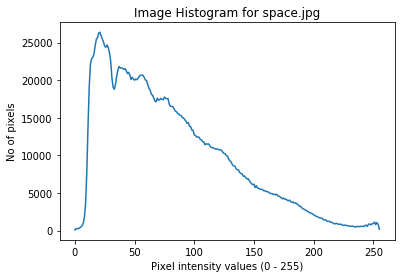

In [8]:
plt.plot(hist)
plt.xlabel('Pixel intensity values (0 - 255)')
plt.ylabel('No of pixels')
plt.title('Image Histogram for space.jpg')
plt.show()


## **Histogram Processing**

Its usually advised to normalize a histogram by dividing each of its value by total number of pixels in that image, thus forming a normalised histogram.

This normalised histogram can be interpreted probability functions that denote the probability of occurrence of a gray scale intensity rk (just a variable) in the image. But it goes without mentioning that sum of of all components of a normalized histogram is 1.

We will see how to exploit the properties of image histograms using OpenCV and python.

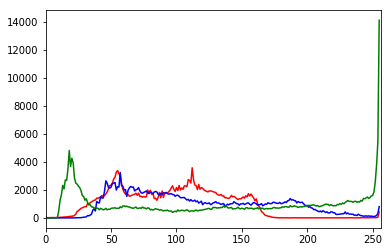

In [18]:

import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('sunset.jpg')
color = {'b','g','r'}
for i,col in enumerate(color):
    histr = cv2.calcHist([img], [i], None, [256], [0,256])
    plt.plot(histr, color = col)
    plt.xlim([0,256])
plt.show()

## **Why is histogram equalisation used??**

Histogram equalization is a method in image processing of contrast adjustment using the image's histogram. It is not necessary that contrast will always be increase in this. There may be some cases were histogram equalization can be worse. In that cases the contrast is decreased.

Note: Generally, histogram equalisation is useful only when the histogram is confined to one region of the image. It does not work when there is large intensity variations, (i.e) where histogram covers a large area.

This method usually increases the global contrast of many images, especially when the usable data of the image is represented by close contrast values. Through this adjustment, the intensities can be better distributed on the histogram. This allows for areas of lower local contrast to gain a higher contrast. Histogram equalization accomplishes this by effectively spreading out the most frequent intensity values.

For an example, You can see the changes that occur after histogram equalisation, (notice the increase in contrast in the new image)

<img src = "old_hist.jpg" width = 600 height = 600> 

The intensities are distributed evenly accross the histogram, which is shown here,

<img src = "hist_equal.png">

## Histogram Equalisation in OpenCV

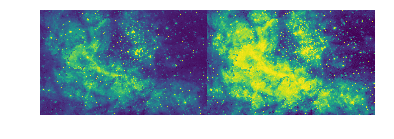

In [23]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('space.jpg',0)
equ = cv2.equalizeHist(img)
res = np.hstack((img, equ))
plt.axis("off")
plt.imshow(res)
plt.show()



In the above image we can note increase in contrast in the image. Generally, histogram modeling techniques (e.g. histogram equalization) provide a sophisticated method for modifying the dynamic range and contrast of an image by altering that image such that its intensity histogram has a desired shape (here a flat histogram).

Histogram equalization employs a monotonic, non-linear mapping which re-assigns the intensity values of pixels in the input image such that the output image contains a uniform distribution of intensities (i.e. a flat histogram).


### CLAHE (Contrast Limited Adaptive Histogram Equalization)

 Applying histogram equalisation, considers global contrast of the image. It differs from ordinary histogram equalization in the respect that the adaptive method computes several histograms, each corresponding to a distinct section of the image, and uses them to redistribute the lightness values of the image. It is therefore suitable for improving the local contrast and enhancing the definitions of edges in each region of an image

### CLAHE in OpenCV

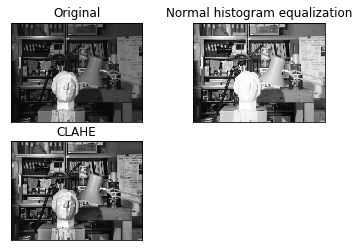

In [42]:
import cv2
import numpy as np

img = cv2.imread('tsukuba_1.png', 0)

# Create a CLAHE object (Arguments are optional)
clahe = cv2.createCLAHE(clipLimit = 2.0, tileGridSize = (8,8))
cll = clahe.apply(img)

#Normal Equalisation
equ = cv2.equalizeHist(img)

plt.subplot(2,2,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(equ,cmap = 'gray')
plt.title('Normal histogram equalization'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,3),plt.imshow(cll,cmap = 'gray')
plt.title('CLAHE'), plt.xticks([]), plt.yticks([])
plt.show()

## Histogram Backprojection

It is used for image segmentation or finding objects of interest in an image. In simple words, it creates an image of the same size (but single channel) as that of our input image, where each pixel corresponds to the probability of that pixel belonging to our object. In more simpler worlds, the output image will have our object of interest in more white compared to remaining part. Well, that is an intuitive explanation. (I can’t make it more simpler). Histogram Backprojection is used with camshift algorithm etc.

Let's see how it works

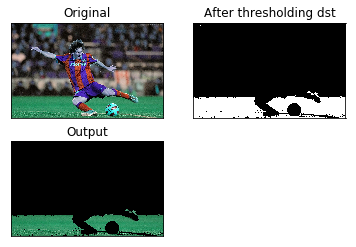

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

roi = cv2.imread("grass.jpeg") #We are going to segment only the grass
hsv = cv2.cvtColor(roi, cv2.COLOR_BGR2HSV)

target = cv2.imread('football.jpg') #This is our target image
hsvt =  cv2.cvtColor(target, cv2.COLOR_BGR2HSV)

#Calculating the object histogram
roihist = cv2.calcHist([hsv], [0,1], None, [180,256], [0,180,0,256])

#normalize the histogram and apply backprojection
cv2.normalize(roihist, roihist,0,255, cv2.NORM_MINMAX)
dst = cv2.calcBackProject([hsvt], [0,1], roihist, [0,180,0,256],1)

#Now convolve with circular disc
disc = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5,5))
cv2.filter2D(dst, -1, disc, dst)

#thresholding and binary and
ret, thresh = cv2.threshold(dst, 50,255,0)
thresh = cv2.merge((thresh, thresh, thresh))
res = cv2.bitwise_and(target, thresh)

plt.subplot(2,2,1),plt.imshow(target,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(thresh,cmap = 'gray')
plt.title('After thresholding dst'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,3),plt.imshow(res,cmap = 'gray')
plt.title('Output'), plt.xticks([]), plt.yticks([])
plt.show()

# **Image Enhancement**

## Contrast Enhancement

Contrast is the difference in the luminance or colour of adjacent surfaces, that makes objects distinguishable. In visual perception, contrast is determined by the difference in brightness and colour. If the contrast of an image is highly concentrated on a specific range, information may be lost in the areas which are excessively and uniformly concentrated. The idea behind contrast enhancement is to increase the range of grey intensities in the image


### Linear Contrast Enhancement

Commonly referred to as contrast stretching, this method involves linearly expanding the original set of data into a new distribution. 

*Methods of Linear Contrast Enhancement are:*

1) Max-min linear contrast stretch:

When using the min-max linear contrast stretch, the original minimum and maximum values of the data area assigned to a newly specified set of values that utilize the full range of available brightness values.

Consider an image with a minimum brightness value of 45 and a maximum value of 205.When such an image is viewed without enhancements,the values of 0 to 44 and 206 to 255 are not displayed.Important spectral differences can be detetected by stretching the minimum value of 45 to 0 and the maximum value of 120 to 255.

This is done below using cv2.normalize() for which we will have to supply new maximum and minimum intensity values

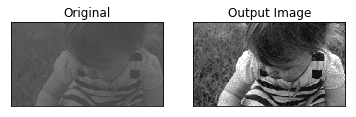

In [47]:
import cv2

img = cv2.imread('baby.png') #Input image
nmax = 255 #New maximum
nmin = 0 #New minimum

#The following function will scale and shift the histogram of the input image so
#that the output image's histogram has a minimum value of nmin and a maximum
#value of nmax.
out = cv2.normalize(img,None,alpha = nmin,beta = nmax,norm_type = cv2.NORM_MINMAX) 

plt.subplot(1,2,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2),plt.imshow(out,cmap = 'gray')
plt.title('Output Image'), plt.xticks([]), plt.yticks([])
plt.show()


### 2) Percentage linear contrast stretch:

A method similar to the one above, this uses specified max and min values that lie in a certain percentage of pixels, from the mean of the histogram. The standard deviation is often used to push the boundaries of the range.

### Non Linear Contrast Enhancement

Histogram equalization is one of the most useful and important form of contrast enhancement. 

## Gamma Correction
Gamma correctionis used in displaying an image accurately on a computer screen. Gamma correction controls the overall brightness of an image. Images which are not properly corrected can look either bleached out, or too dark.



### Why it is done
* Our eyes do not perceive light the same way as cameras.On a camera when twice the number of photons strike at a point it is considered twice asa bright(a linear relationship).  However, that’s not how our human eyes work. Instead, we perceive double the amount of light as only a fraction brighter (a non-linear relationship)! 

![](https://cdn.cambridgeincolour.com/images/tutorials/gamma_chart1e.png)
* Gamma correction also gives more bandwidth to darker tones (where our eyes are more sensitive)

### What is a gamma Correction:

Gamma correction is also known as the Power Law Transform. First, our image pixel intensities must be scaled from the range [0, 255] to [0, 1.0]. From there, we obtain our output gamma corrected image by applying the following equation:

\begin{equation}
(Input Image)^{\frac{1}{\gamma}}\ = Output Image
\end{equation}

The output image O is then scaled back to the range [0, 255].

For gamma corrections in darker toned images we use gamma >1.0 so that more colours in are observed that have a darker tone When gamma = 1.0 there is no change in the image

For images that are too bright(bleached out) we use gamma values of <1.0 so that more colours can be observed that have a bright tone

Lets implement this using OpenCV and numpy , first seeing how camera sees an image (using a generic value of gamma = 2.2 which is pretty common) and then see the corrected image.

In [48]:
image = cv2.imread('sunset.jpg',1)

In [49]:
#this function replaces each pixel in the image with its gamma correcteed version using a lookup table
def gamma(img,g=1.00):
    invGamma = 1.0 / g
    table = np.array([((i / 255.0) ** invGamma) * 255
        for i in np.arange(0, 256)]).astype("uint8")
    return cv2.LUT(image, table)
    

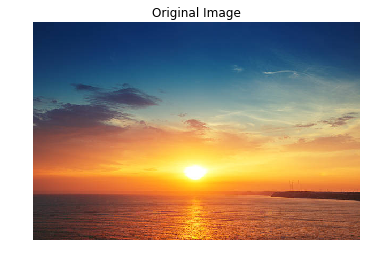

In [50]:
image = cv2.imread('sunset.jpg',1)
plt.axis("off")
plt.title("Original Image")
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()


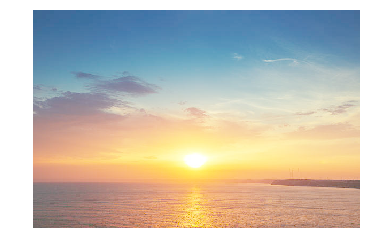

In [51]:
#this image( or any other image u see on the internet unless u specifically go looking for it) is already gamma corrected.lets take a look at how a camera sees it
plt.axis("off")
image = gamma(image,2.2)
plt
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

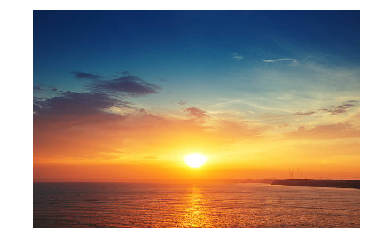

In [35]:
#that is how a camera sees it. let us perform gamma correction now on this image
#to retrieve the original image
plt.axis("off")
image = gamma(image,1.0/2.2)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

# Filtering

Just like one dimensional signals, images can also be filtered using various kinds of low pass filters or high pass filters. A low pass filter blurs the image and helps in removing noise. On the other hand a high pass filter is used to find edges in an image



## Convolution

For a filter H of size (2k+1)x(2k+1) convo

lved with an image F to give image G:

\begin{equation} 
G\big[ i,j \big] = \sum_{u=-k} ^{k} \sum_{v = -k} ^k H\big[u,v\big] F\big[x+u,y+v \big]
\end{equation}

This is technically correlation but it is loosely called convolution.

Yes, that's a pretty big formula. What actually happens is as follows:

Let our input image be F which we want to convolve with say a 3x3 filter H. What we do is first place our filter on one corner of the image F such that it overlaps with the 9 pixels in that corner. 
We now multiply the corresponding values of the filter and the pixels it overlaps with and then sum it up. We then replace the center of the pixels of the image which the filter overlaps with the calculated sum. We now move our filter to right by one pixel and repeat the process.

We will demonstrate this with the following filter kernel: 

\begin{equation}
K = \frac{1}{25}
\begin{bmatrix}
1 & 1 & 1 & 1 & 1\\ 
1 & 1 & 1 & 1 & 1\\
1 & 1 & 1 & 1 & 1\\
1 & 1 & 1 & 1 & 1\\
1 & 1 & 1 & 1 & 1\\
\end{bmatrix}
\end{equation}

This is a 5x5 averaging filter. It will replace the center of the kernel with the average of the 25 pixels below it.

OpenCV has a function cv2.filter2D() to convolve a kernel with an image. Let's see the effect of convolving an image with this kernel.

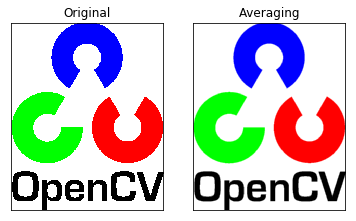

In [12]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('opencv-logo.png')

kernel = np.ones((5,5),np.float32)/25 #Creating the normalised kernel
dst = cv2.filter2D(img,-1,kernel) #Perform the convolution

plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(dst),plt.title('Averaging')
plt.xticks([]), plt.yticks([])
plt.show()

## Image Blurring (or Smoothing)

Image blurring is done by convolving the image with a low pass filter. This removes high frequency content and is often used for noise removal. It also tends to blur edges (but there are ways to avoid blurring edges - which we will look into)

There are 4 main blurring techniques in OpenCV

### 1. Averaging:

We have already looked into this. We can also use cv2.blur() or cv2.boxFilter() for doing this. cv2.blur() by default uses a normalised kernel. If you don't want to use a normalised kernel use cv2.boxFilter() and pass normalize = False to the function.





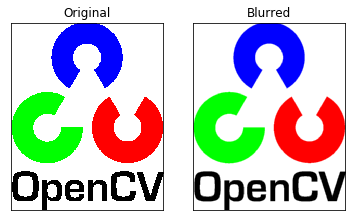

In [11]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('opencv-logo.png')

blur = cv2.blur(img,(5,5)) #Only have to pass the input image and the kernel size

plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(blur),plt.title('Blurred')
plt.xticks([]), plt.yticks([])
plt.show()

### 2. Gaussian Blurring:

We can use cv2.GaussianBlur() to use a gaussian kernel instead of a simple box filter. This method is very effective in removing gaussian noise from an image. We need to pass the kernel size and the standard deviation in the X and Y directions to the image. If only the X direction standard deviation is passed then it uses the same for Y also. If both are passed as 0 then the function calculates the standard deviation from the kernel size.

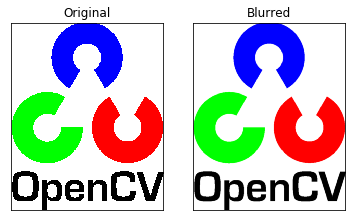

In [10]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('opencv_logo.png')

blur = cv2.GaussianBlur(img,(5,5),0) #Pass the third argument as 0 for the function to automatically calculate the standard deviations

plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(blur),plt.title('Blurred')
plt.xticks([]), plt.yticks([])
plt.show()

### 3. Median Blurring:

We can do this using cv2.medianBlur(). This function replaces the center pixel with the median of all the values under the kernel. This method is highly effective against salt and pepper noise. 

In median blurring the center element is replaced with a value which was previously present in the image (unlike other filtering techniques)

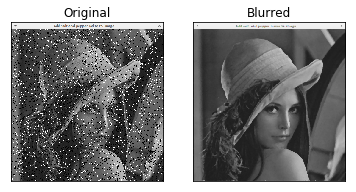

In [9]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('saltnpepper.png')

blur = cv2.medianBlur(img,5) #Kernel size should be a positive odd integer

plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(blur),plt.title('Blurred')
plt.xticks([]), plt.yticks([])
plt.show()

### 4. Bilateral Filtering:

Done using cv2.bilateralFilter(), this function is very effective in noise removal while preserving edges but is also slower. 

The bilateral filter takes two gaussian filters. One is a normal gaussian filter of space while the other one is a function of pixel difference. The second filter ensures that only those pixels with a similar intensity to the center pixel is considered for blurring and hence preserves edges where there are high intensity variations.

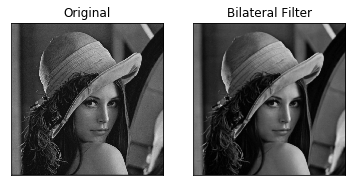

In [8]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('portrait.jpg',0)

blur = cv2.bilateralFilter(img,9,75,75) #Second argument is the size of kernel and the other 2 arguments are the standard deviations for the two gaussian kernels.

plt.subplot(121),plt.imshow(img,cmap = 'gray'),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(blur,cmap = 'gray'),plt.title('Bilateral Filter')
plt.xticks([]), plt.yticks([])
plt.show()

# Edge Detection

In this section we will show how to find edges in an image. Edges are points of rapid change (high gradient). High pass filters are usually used to find edges in an image. 

### 1. Sobel operator

Sobel operator is a joint Gaussian smoothing and differential operator. It is more resistant to noise. There are two sobel operators: one for finding the horizontal derivatives and one for finding the vertical derivatives. 

For horizontal derivatives: 
\begin{equation}
\frac{1}{8}
\begin{bmatrix}
-1 & 0 & 1\\
-2 & 0 & 2 \\
-1 & 0 & 1
\end{bmatrix}
\end{equation}

For vertical derivatives:
\begin{equation}
\frac{1}{8}
\begin{bmatrix}
1 & 2 & 1\\
0 & 0 & 0 \\
-1 & -2 & -1
\end{bmatrix}
\end{equation}

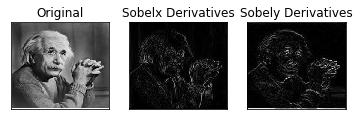

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('laplacian1.jpg',0)
sobelx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize = 3)
#Second parameter in the above function is the output datatype. It is a float so that we consider both positive and negative derivatives
#The third and fourth parameter indicate that we are finding horizontal gradients; pass 0,1 to find vertical gradients
#The fifth argument is the size of kernel. Here we are using a 3x3 kernel which is the same one mentioned previously

sobelx = np.absolute(sobelx) #So that even negative gradients can be displayed in the output image

sobely = cv2.Sobel(img,cv2.CV_64F,0,1,ksize = 3)
sobely = np.absolute(sobely)

plt.subplot(1,3,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,2),plt.imshow(sobelx,cmap = 'gray')
plt.title('Sobelx Derivatives'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,3),plt.imshow(sobely,cmap = 'gray')
plt.title('Sobely Derivatives'), plt.xticks([]), plt.yticks([])
plt.show()
plt.show()

### 2. Laplacian operator

This is covered later under Edge Enhancement

### 3. Canny Edge Detection

This is a very popular multi-stage algorithm. We will not go through all the steps of the algorithm here but just show how to implement it. 

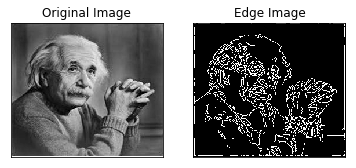

In [6]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('laplacian1.jpg',0)
edges = cv2.Canny(img,100,200) #The second and third arguments are threshold values minval and maxval between a edge must lie.

plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

plt.show()



## **Edge Enhancement**


Edge enhancement is an image processing filter that enhances the edge contrast of an image or video in an attempt to improve its acutance (apparent sharpness). It is usually done in the following ways 





### **Using Laplacian Operator**

Laplacian Operator is a derivative operator which is used to find edges in an image. The major difference between Laplacian and other operators is that it is a second order derivative mask. 

Laplacian Operator    $\begin{bmatrix}0 & 1 & 0\\1 & -4 & 1\\0 &1 & 0\end{bmatrix}$

Laplacian is a derivative operator; it highlights gray level discontinuities in an image and tries to deemphasize regions with slowly varying gray levels. This operation in result produces images which have grayish edge lines and other discontinuities on a dark background. This produces inward and outward edges in an image

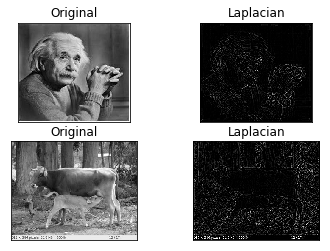

In [5]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread("laplacian1.jpg",0) 
img2 = cv2.imread("cow.jpg",0) 
 
laplacian = cv2.Laplacian(img,cv2.CV_8U) #Calculate laplacian
laplacian2 = cv2.Laplacian(img2,cv2.CV_8U)

plt.subplot(2,2,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(laplacian,cmap = 'gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,3),plt.imshow(img2,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,4),plt.imshow(laplacian2,cmap = 'gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
plt.show()


### **Using Difference of Gaussians**

A majority of the edge enhancement algorithms commonly employed in digital image processing often produce the unwanted side effect of increasing random noise in the image. Because it removes high-frequency spatial detail that can include random noise, the difference of gaussians algorithm is useful for enhancing edges in noisy digital images.

This algorithm works by performing two different Gaussian blurs on the image, with a different blurring radius for each, and subtracting them to yield the result. Increasing the smaller radius tends to give thicker-appearing edges, and decreasing the larger radius tends to increase the “threshold” for recognizing something as an edge. In most cases you will get nicer results if Radius 2 is smaller than Radius 1, but in situations where you have a light figure on the dark background, reversing them may actually improve the result.

Blurring an image using a Gaussian kernel suppresses only high-frequency spatial information. Subtracting one image from the other preserves spatial information that lies between the range of frequencies that are preserved in the two blurred images. Thus, the difference of gaussians is equivalent to a band-pass filter that discards all but a handful of spatial frequencies that are present in the original grayscale image. 

In its operation, the difference of gaussians algorithm is believed to mimic how neural processing in the retina of the eye extracts details from images destined for transmission to the brain

When utilized for image enhancement, the difference of gaussians algorithm is typically applied when the size ratio of kernel (2) to kernel (1) is 4:1 or 5:1. 

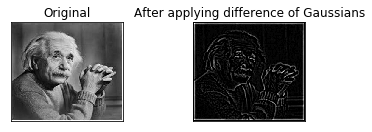

In [4]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread("laplacian1.jpg",0) #Can also try the arrow and the square images

t1 = cv2.GaussianBlur(img,(9,9),0)
t2 = cv2.GaussianBlur(img,(5,5),0)
output = cv2.subtract(t1,t2)

plt.subplot(2,2,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(output,cmap = 'gray')
plt.title('After applying difference of Gaussians'), plt.xticks([]), plt.yticks([])
plt.show()


# THAT'S ALL FOR TODAY FOLKS!

## Thank You!!!